## Elliptic Envelope

One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). From this assumption, we generally try to define the “shape” of the data, and can define outlying observations as observations which stand far enough from the fit shape.

The scikit-learn provides an object covariance.EllipticEnvelope that fits a robust covariance estimate to the data, and thus fits an ellipse to the central data points, ignoring points outside the central mode.

For instance, assuming that the inlier data are Gaussian distributed, it will estimate the inlier location and covariance in a robust way (i.e. without being influenced by outliers). The Mahalanobis distances obtained from this estimate is used to derive a measure of outlyingness. This strategy is illustrated below.
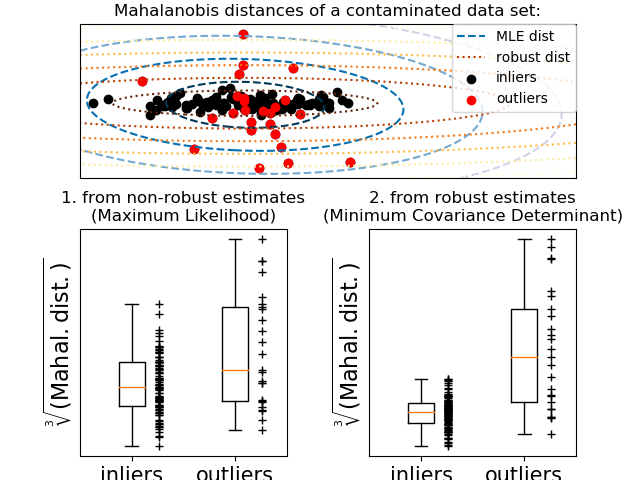

In [139]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [140]:
#Gathering Data
credit = pd.read_csv(r"E:\Github\Python\Risk.txt",sep=",",index_col=False)

In [141]:
#First 5 Rows of Data
credit.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,STORECAR,LOANS,RISK
0,100756,44,59944,m,married,1,2,monthly,y,2,0,good risk
1,100668,35,59692,m,married,1,1,monthly,y,1,0,bad loss
2,100418,34,59508,m,married,1,1,monthly,y,2,1,good risk
3,100416,34,59463,m,married,0,2,monthly,y,1,1,bad loss
4,100590,39,59393,f,married,0,2,monthly,y,1,0,good risk


In [142]:
#Selecting Numeric Fields To Be Used In Modelling
X = credit[['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']]

In [143]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [144]:
#Assining Column Names
X_normalized.columns = ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']

In [145]:
#Implementing Algorithm
from sklearn.covariance import EllipticEnvelope
elliptic = EllipticEnvelope()
elliptic.fit(X_normalized)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [146]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = elliptic.predict(X_normalized)
Anomaly_Score = elliptic.decision_function(X_normalized)

In [147]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [148]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,412
1,3705


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A09C08C88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000024A0A3CDE48>], dtype=object)

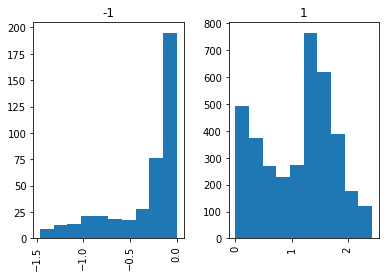

In [149]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [150]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.covariance import EllipticEnvelope
elliptic = EllipticEnvelope(contamination=0.2)
elliptic.fit(X_normalized)

EllipticEnvelope(assume_centered=False, contamination=0.2, random_state=None,
         store_precision=True, support_fraction=None)

In [151]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = elliptic.predict(X_normalized)
Anomaly_Score = elliptic.decision_function(X_normalized)

In [152]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination_1'] = Anomaly_Class
X['Anomaly_Score_Contamination_1'] = Anomaly_Score

In [153]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination_1')[['Anomaly_Score_Contamination_1']].count()

,Anomaly_Score_Contamination_1
Anomaly_Class_Contamination_1,
-1,824
1,3293


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A0A41AA90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000024A0A46CC50>], dtype=object)

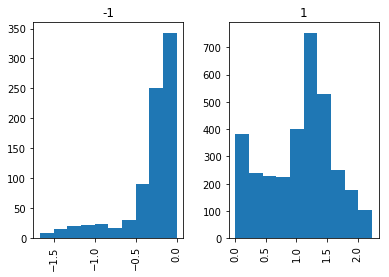

In [154]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination_1'].hist(by=X['Anomaly_Class_Contamination_1'])

In [155]:
#Original Data Set With New Variables
X.head()

,AGE,INCOME,NUMKIDS,NUMCARDS,LOANS,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination_1,Anomaly_Score_Contamination_1
0,44,59944,1,2,0,-1,-1.248786,-1,-1.458321
1,35,59692,1,1,0,-1,-1.277310,-1,-1.487764
2,34,59508,1,1,1,-1,-1.408831,-1,-1.617538
3,34,59463,0,2,1,-1,-1.461867,-1,-1.669902
4,39,59393,0,2,0,-1,-1.220602,-1,-1.430515


In [156]:
#Descriptive Statistics
X['Anomaly_Score_Contamination_1'].describe()

count    4117.000000
mean        0.783512
std         0.755855
min        -1.669902
25%         0.103451
50%         1.020076
75%         1.355320
max         2.234906
Name: Anomaly_Score_Contamination_1, dtype: float64

In [157]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    4117.000000
mean        0.986658
std         0.757077
min        -1.461867
25%         0.305171
50%         1.225131
75%         1.560117
max         2.438886
Name: Anomaly_Score, dtype: float64

In [158]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination_1','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination_1'], ascending=[1])

,Anomaly_Score_Contamination_1,Anomaly_Score
3,-1.669902,-1.461867
2,-1.617538,-1.408831
1,-1.487764,-1.277310
0,-1.458321,-1.248786
4,-1.430515,-1.220602
